# Project Name:Naive Bayesian Classification

# #Step 1: Import Libraries and Load Dataset

First, let's import the libraries and load your dataset. Adjust the file path to match the dataset you provided.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
# Load the dataset
df = pd.read_excel(r"C:\Users\User\Downloads\Covid Dataset.xlsx")
df.head()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [27]:
# Display column names
print(df.columns)


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue',
       'Gastrointestinal', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [28]:
df.shape

(5434, 21)

# Step 2: Exploratory Data Analysis (EDA)

1.Understand the Basic Structure of the Dataset
First, let's check for missing values and get a general overview of each column.

In [29]:
# Check for missing values
print(df.isnull().sum())

# Get basic statistical details of numeric columns
print(df.describe())


Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64
       Breathing Problem Fever Dry Cough S

2.Visualize the Distribution of Each Feature
Since you have both categorical and binary features, histograms or bar charts can be helpful. Let’s use seaborn and matplotlib to create some plots.

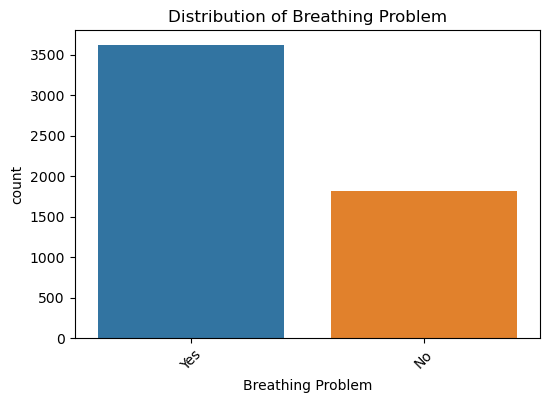

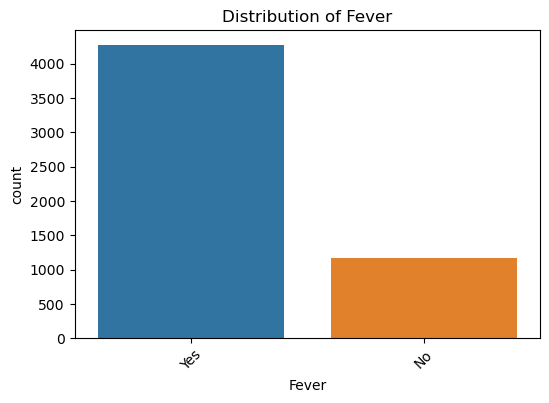

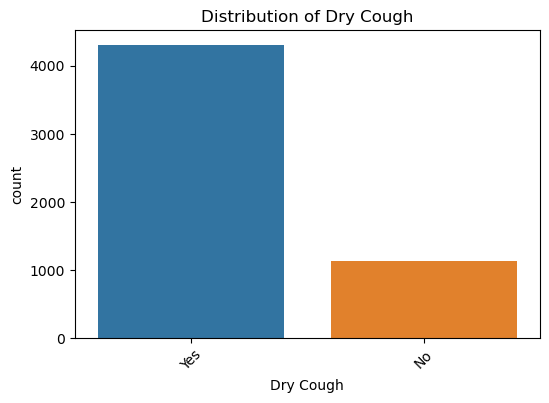

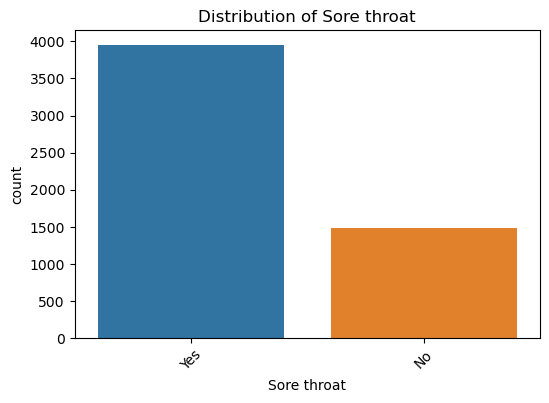

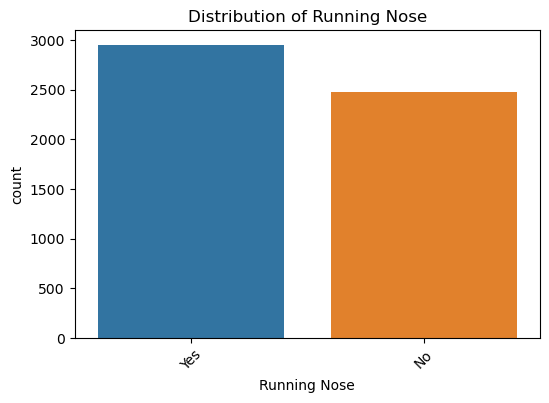

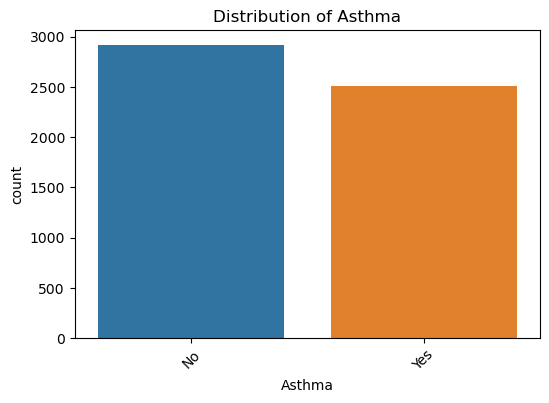

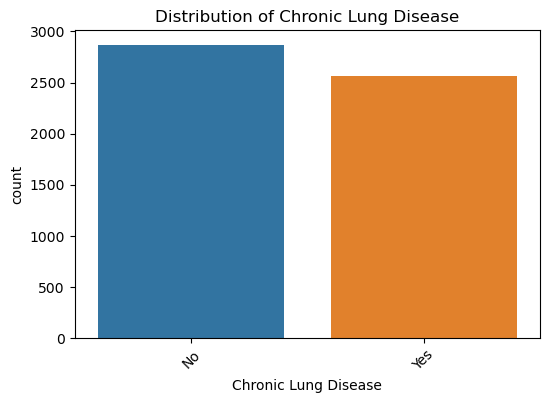

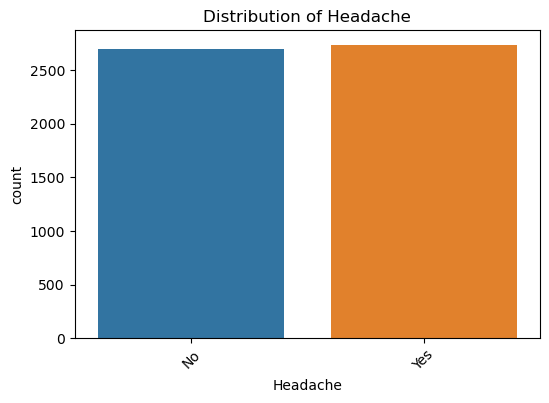

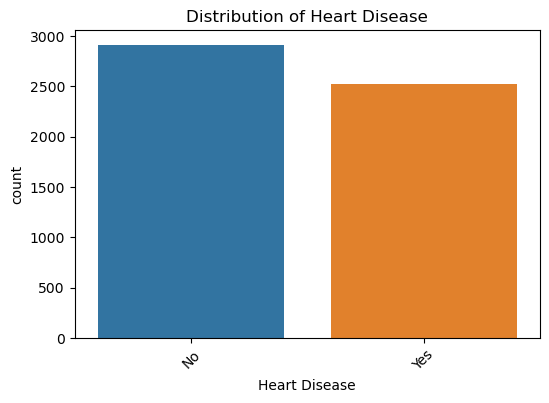

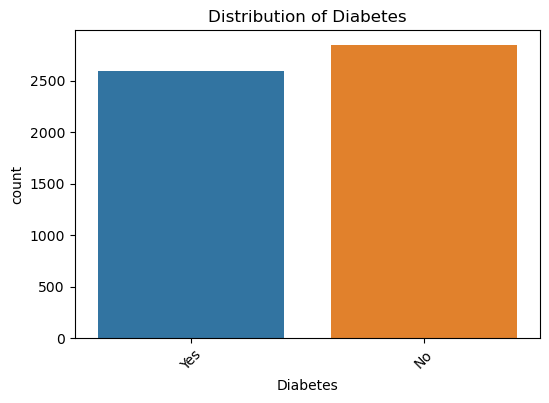

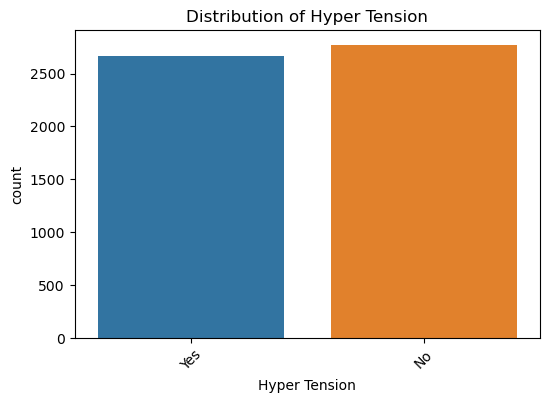

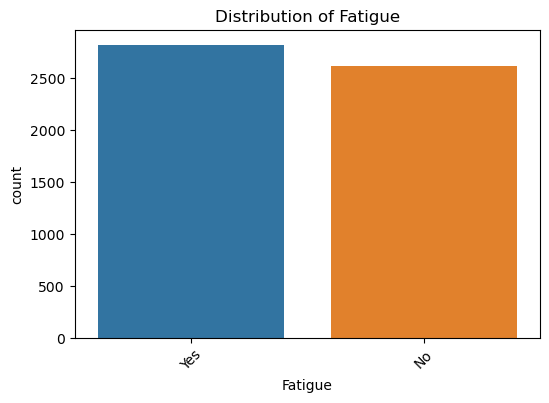

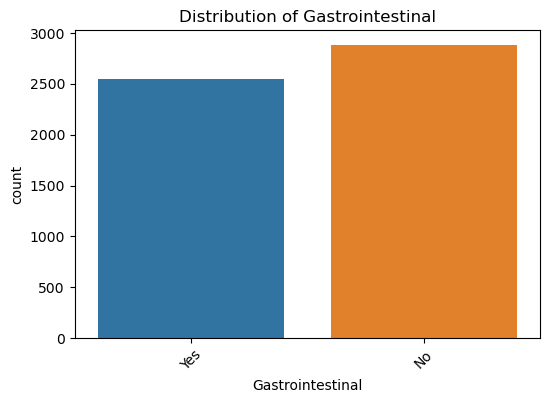

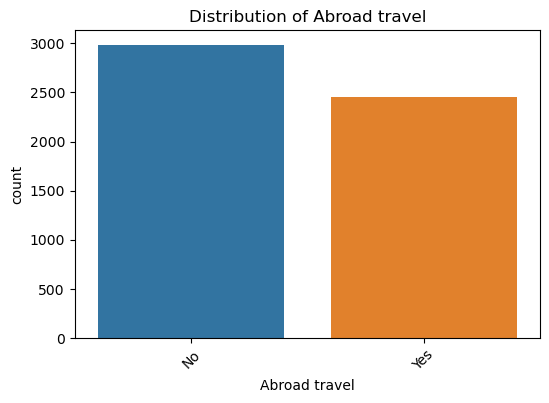

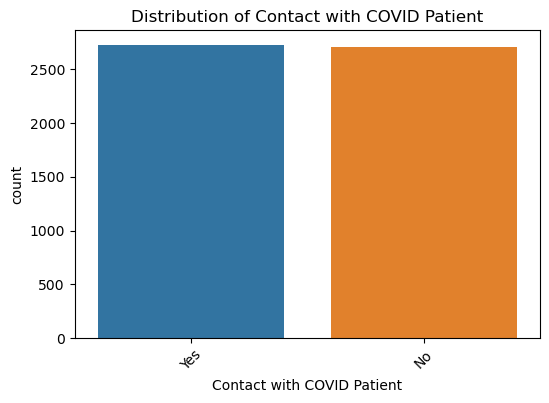

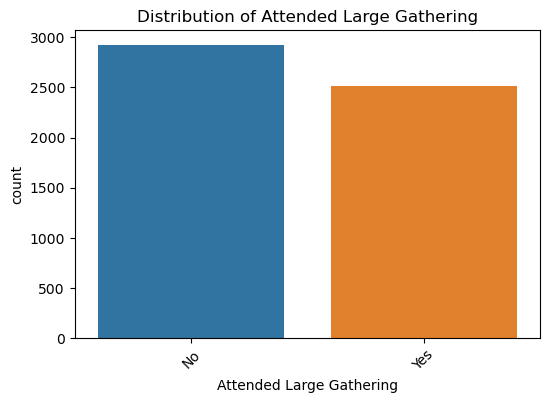

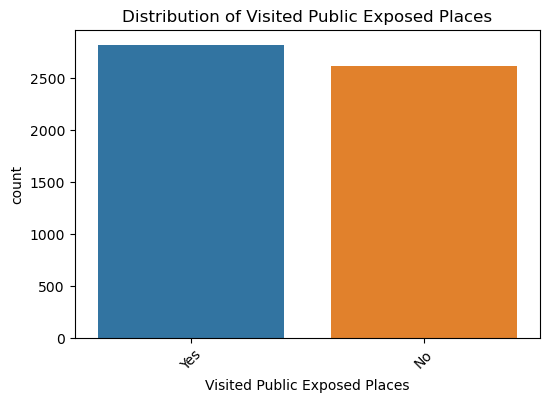

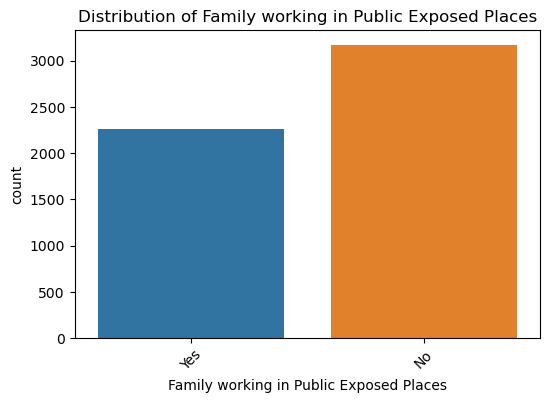

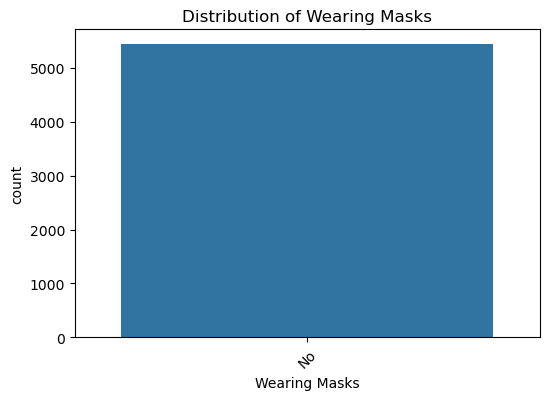

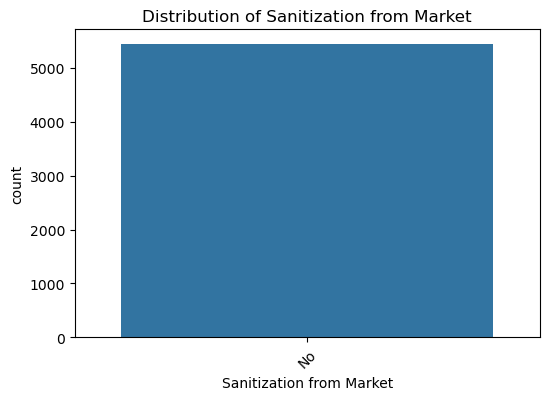

In [30]:
# Plot distribution for each feature
for column in df.columns[:-1]:  # Exclude 'COVID-19' for now
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


3.Analyze the Target Variable (COVID-19)
Check the distribution of the target variable to see how many cases are positive or negative.

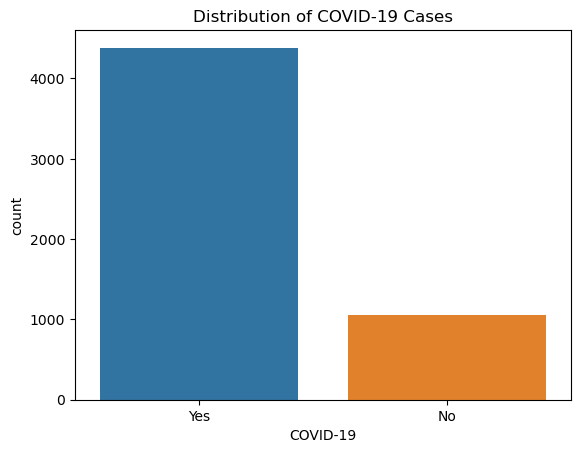

In [31]:
# Distribution of target variable
sns.countplot(x='COVID-19', data=df)
plt.title('Distribution of COVID-19 Cases')
plt.show()


4.Explore Relationships Between Features and Target
To understand how each feature affects the likelihood of COVID-19, you can visualize the relationship between each feature and the target variable.

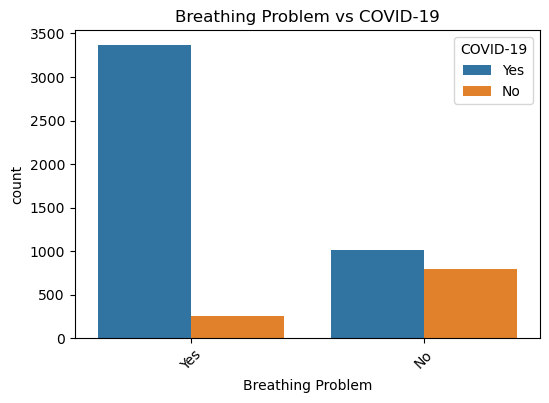

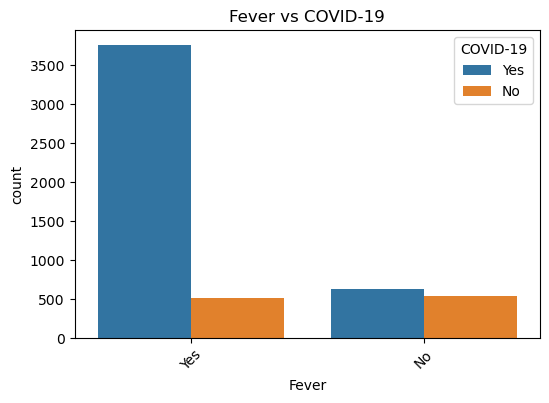

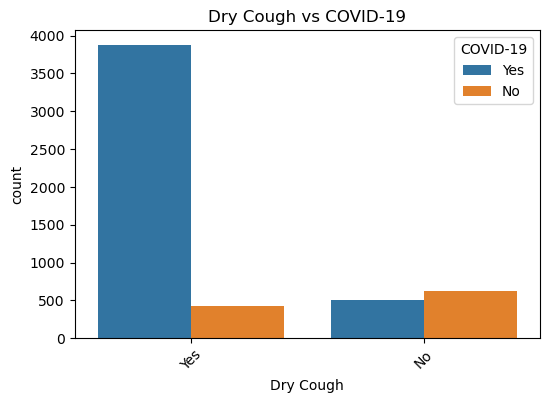

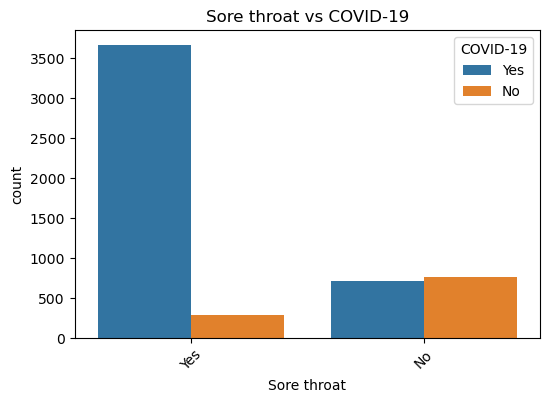

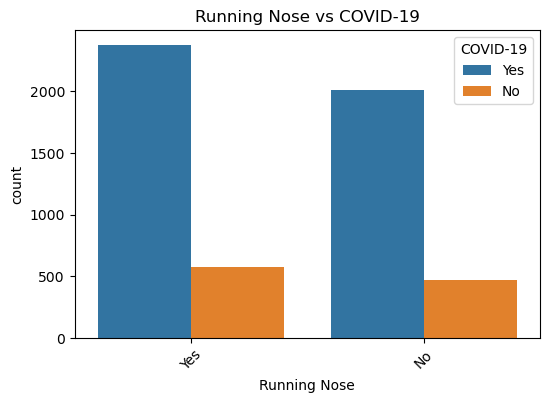

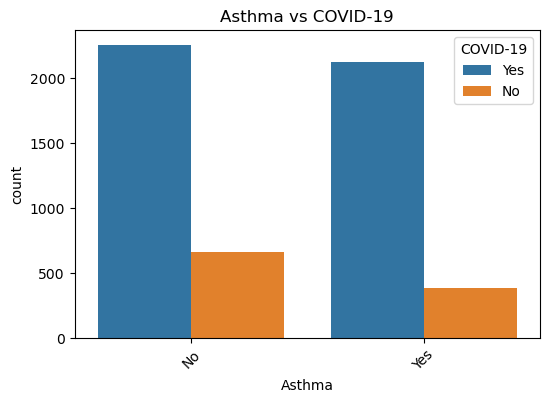

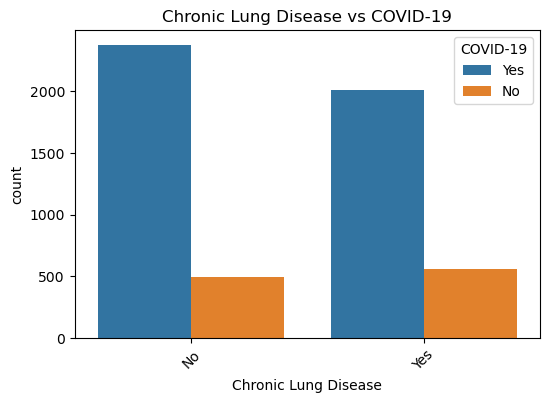

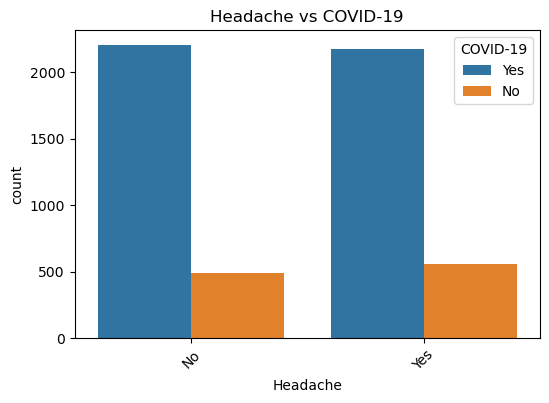

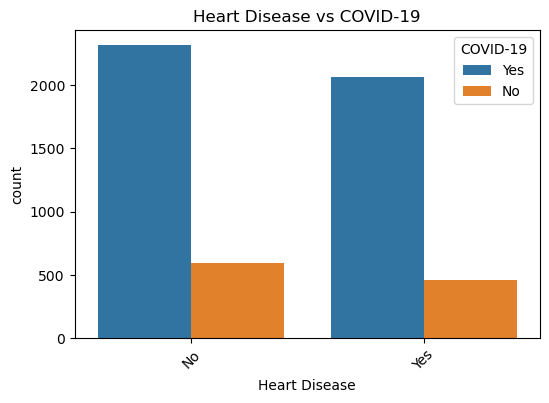

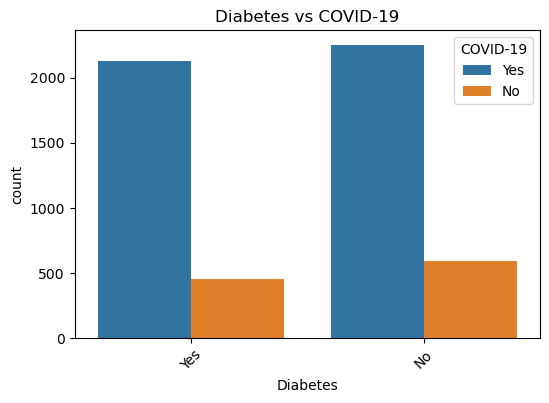

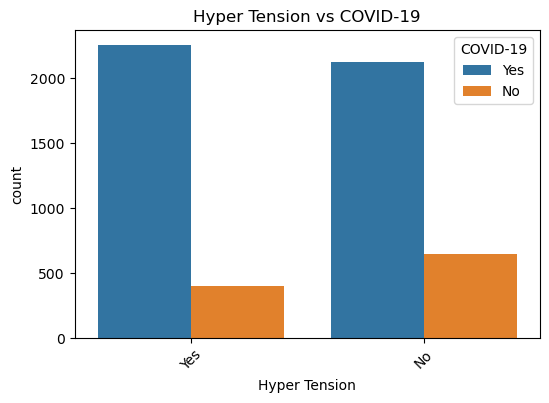

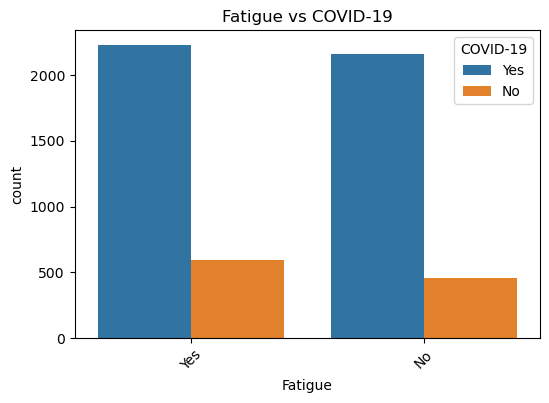

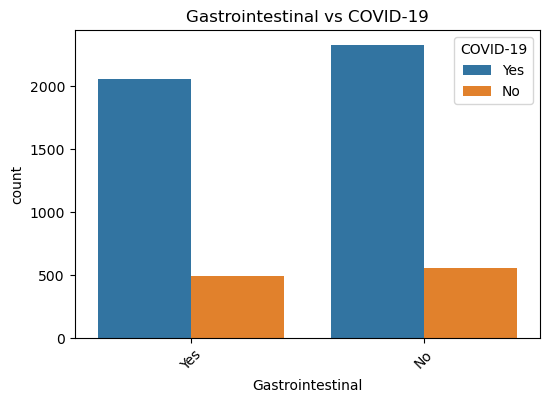

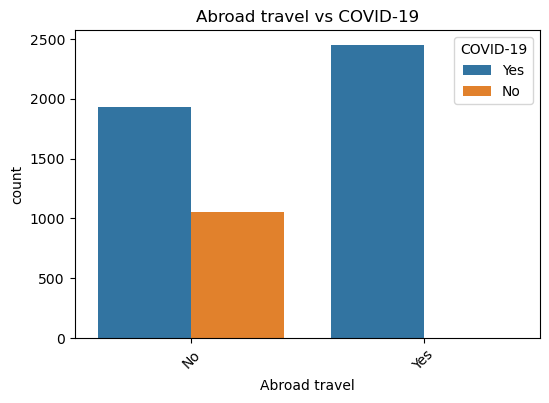

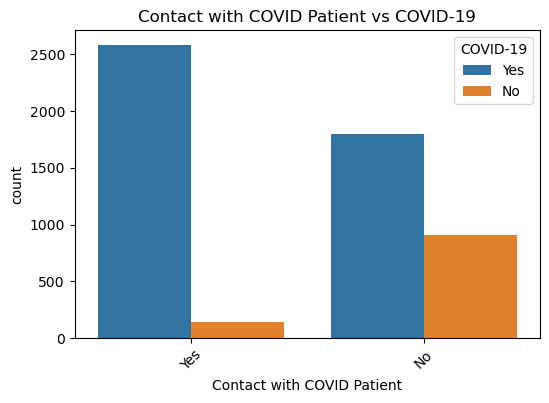

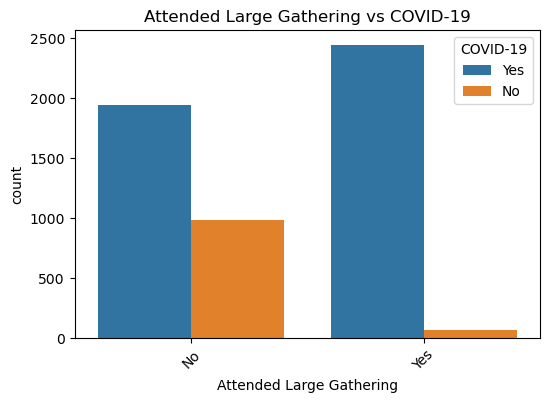

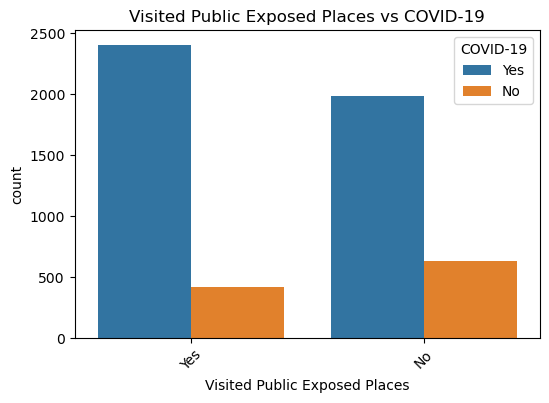

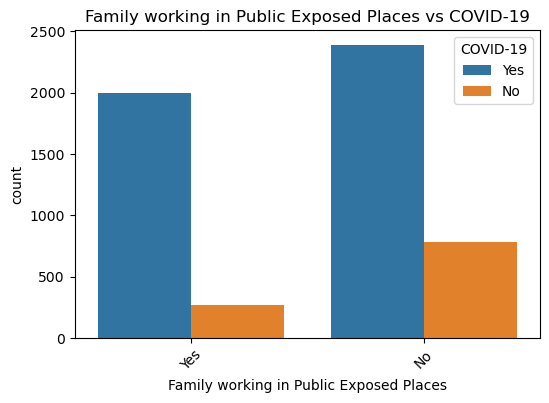

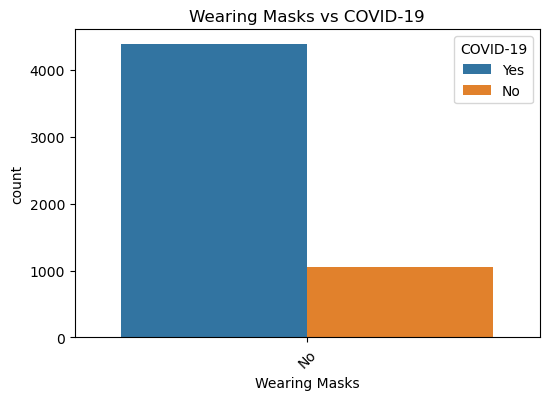

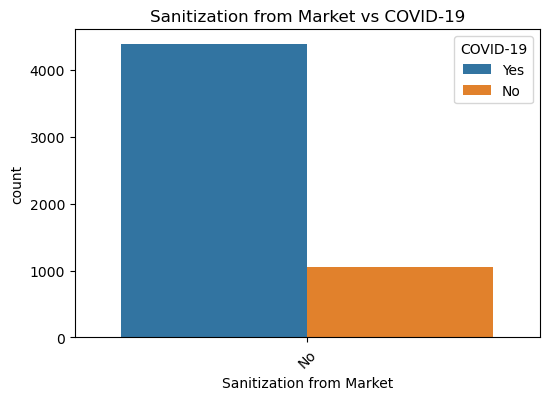

In [32]:
# Plot relationships between each feature and the target variable
for column in df.columns[:-1]:  # Exclude 'COVID-19' for now
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue='COVID-19', data=df)
    plt.title(f'{column} vs COVID-19')
    plt.xticks(rotation=45)
    plt.show()


1. Chi-Square Test of Independence
The Chi-Square test is useful for categorical data to assess the association between two variables. In this case, you can use it to determine if there’s a significant relationship between each feature and the target.

Steps:

Convert the "Yes"/"No" values to binary values (1/0).
Perform the Chi-Square test on each feature and the target.
The p-value from this test will indicate whether there’s a significant association between each feature and the target.

In [33]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'data' is your DataFrame and 'target' is the target column
for feature in df.columns.drop('COVID-19'):
    contingency_table = pd.crosstab(df[feature], df['COVID-19'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}, p-value: {p}")


Feature: Breathing Problem, p-value: 3.4325369385797304e-234
Feature: Fever, p-value: 1.0351935621803844e-148
Feature: Dry Cough, p-value: 4.29051765771245e-256
Feature: Sore throat, p-value: 3.883192428698195e-300
Feature: Running Nose, p-value: 0.7020545178918232
Feature: Asthma, p-value: 4.25904980447537e-11
Feature: Chronic Lung Disease, p-value: 3.247536612829696e-05
Feature: Headache, p-value: 0.04396354709914081
Feature: Heart Disease, p-value: 0.049854765450809545
Feature: Diabetes, p-value: 0.0030714308024200757
Feature: Hyper Tension, p-value: 5.190689126193811e-14
Feature: Fatigue, p-value: 0.0012686779395538635
Feature: Gastrointestinal, p-value: 0.830718413743313
Feature: Abroad travel, p-value: 2.4669793454509484e-234
Feature: Contact with COVID Patient, p-value: 2.4203406576917913e-152
Feature: Attended Large Gathering, p-value: 1.841671371089569e-181
Feature: Visited Public Exposed Places, p-value: 1.4506264239942003e-18
Feature: Family working in Public Exposed Places,

2. Cramér’s V:
Cramér's V is another statistical method to measure the strength of association between two categorical variables, giving a value between 0 (no association) and 1 (perfect association).

In [34]:
import numpy as np

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramér's V for each feature
for feature in df.columns.drop('COVID-19'):
    v = cramers_v(df[feature], df['COVID-19'])
    print(f"Cramér's V for {feature}: {v}")


Cramér's V for Breathing Problem: 0.44326981559488615
Cramér's V for Fever: 0.35232219311409996
Cramér's V for Dry Cough: 0.46371743470362314
Cramér's V for Sore throat: 0.5023246088172061
Cramér's V for Running Nose: 0.005189514781159802
Cramér's V for Asthma: 0.08946230443701486
Cramér's V for Chronic Lung Disease: 0.056370315303902234
Cramér's V for Headache: 0.027327136834809293
Cramér's V for Heart Disease: 0.02660503510903012
Cramér's V for Diabetes: 0.04016102728064719
Cramér's V for Hyper Tension: 0.10210897360297885
Cramér's V for Fatigue: 0.04372167225298649
Cramér's V for Gastrointestinal: 0.002900065443883276
Cramér's V for Abroad travel: 0.4434067948445737
Cramér's V for Contact with COVID Patient: 0.3566563324681418
Cramér's V for Attended Large Gathering: 0.38967746598365305
Cramér's V for Visited Public Exposed Places: 0.11928847017187703
Cramér's V for Family working in Public Exposed Places: 0.159735044790973
Cramér's V for Wearing Masks: nan
Cramér's V for Sanitizati

C:\Users\User\AppData\Local\Temp\ipykernel_19708\2366226132.py:8: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\User\AppData\Local\Temp\ipykernel_19708\2366226132.py:8: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))


# #Step 3: Data Preprocessing

In [ ]:
Handle Missing Values: Fill or drop missing values as needed.
Encode Categorical Variables: Use label encoding or one-hot encoding as required.
Standardize Numeric Variables (for Gaussian Naïve Bayes).

In [35]:
missing_values = df.isnull().sum()
print(missing_values)


Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample p-values dictionary (replace these with your actual p-values)
p_values = {
    'Breathing Problem': 3.43e-234,
    'Fever': 1.03e-148,
    'Dry Cough': 4.29e-256,
    'Sore throat': 3.88e-300,
    'Asthma': 4.25e-11,
    'Chronic Lung Disease': 3.25e-05,
    'Diabetes': 0.003,
    'Hyper Tension': 5.19e-14,
    'Abroad travel': 2.47e-234,
    'Contact with COVID Patient': 2.42e-152,
    'Attended Large Gathering': 1.84e-181,
    'Visited Public Exposed Places': 1.45e-18,
    'Family working in Public Exposed Places': 5.25e-32,
    # Add more features and their p-values as necessary
}

# Create an instance of LabelEncoder
le = LabelEncoder()

# Define a list of categorical columns with significant p-values and Cramér's V values
significant_categorical_columns = [
    'Breathing Problem',   # p-value: 3.43e-234, Cramér's V: 0.443
    'Fever',               # p-value: 1.03e-148, Cramér's V: 0.352
    'Dry Cough',          # p-value: 4.29e-256, Cramér's V: 0.464
    'Sore throat',        # p-value: 3.88e-300, Cramér's V: 0.502
    'Asthma',              # p-value: 4.25e-11, Cramér's V: 0.089 (may consider keeping)
    'Chronic Lung Disease', # p-value: 3.25e-05, Cramér's V: 0.056 (may consider keeping)
    'Diabetes',            # p-value: 0.003, Cramér's V: 0.040
    'Hyper Tension',       # p-value: 5.19e-14, Cramér's V: 0.102
    'Abroad travel',       # p-value: 2.47e-234, Cramér's V: 0.443
    'Contact with COVID Patient', # p-value: 2.42e-152, Cramér's V: 0.357
    'Attended Large Gathering', # p-value: 1.84e-181, Cramér's V: 0.390
    'Visited Public Exposed Places', # p-value: 1.45e-18, Cramér's V: 0.119
    'Family working in Public Exposed Places', # p-value: 5.25e-32, Cramér's V: 0.160
    # Exclude 'Running Nose', 'Headache', 'Fatigue', 'Gastrointestinal', 
    # 'Wearing Masks', and 'Sanitization from Market' as they have low associations or NaN.
]

# Filter out features with p-values greater than 0.05
significant_features = [feature for feature, p in p_values.items() if p < 0.05]

# Combine both lists to get unique significant features for encoding
combined_significant_features = set(significant_categorical_columns + significant_features)

# Loop through each significant feature and apply LabelEncoder
for column in combined_significant_features:
    if column in df.columns:  # Check if the column exists in the DataFrame
        df[column] = le.fit_transform(df[column])

# Optional: Drop non-significant features if desired
df = df[list(combined_significant_features) + ['COVID-19']]  # Include the target variable in the DataFrame

# Optionally, review the transformed DataFrame
print(df[list(combined_significant_features) + ['COVID-19']].head())


   Attended Large Gathering  Asthma  Fever  Dry Cough  \
0                         0       0      1          1   
1                         1       1      1          1   
2                         0       1      1          1   
3                         1       1      1          1   
4                         0       0      1          1   

   Visited Public Exposed Places  Abroad travel  Breathing Problem  \
0                              1              0                  1   
1                              1              0                  1   
2                              0              1                  1   
3                              1              1                  1   
4                              1              0                  1   

   Chronic Lung Disease  Diabetes  Hyper Tension  Sore throat  \
0                     0         1              1            1   
1                     1         0              0            1   
2                     1         1        

In [37]:
df.head()

,Attended Large Gathering,Asthma,Fever,Dry Cough,Visited Public Exposed Places,Abroad travel,Breathing Problem,Chronic Lung Disease,Diabetes,Hyper Tension,Sore throat,Contact with COVID Patient,Family working in Public Exposed Places,COVID-19
0,0,0,1,1,1,0,1,0,1,1,1,1,1,Yes
1,1,1,1,1,1,0,1,1,0,0,1,0,0,Yes
2,0,1,1,1,0,1,1,1,1,0,1,0,0,Yes
3,1,1,1,1,1,1,1,0,1,0,0,0,0,Yes
4,0,0,1,1,1,0,1,1,1,1,1,1,0,Yes


In [38]:
df.shape

(5434, 14)

In [39]:
# Separate features and target variable
X = df.drop('COVID-19', axis=1)  
y = df['COVID-19']

# Standardize features for Gaussian Naive Bayes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 4: Split Data into Training and Testing Sets
Split your dataset for training and testing.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Step 5: Train the Naïve Bayes Model
Choose the appropriate Naïve Bayes model type. Here, we’ll use GaussianNB for continuous features.

In [41]:
# Initialize and train the model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

# Step 6: Make Predictions and Evaluate the Model
After training the model, let's evaluate its performance on the test set.

Accuracy: 0.75


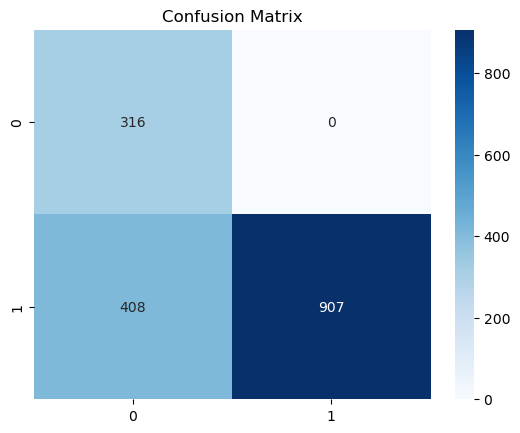

              precision    recall  f1-score   support

          No       0.44      1.00      0.61       316
         Yes       1.00      0.69      0.82      1315

    accuracy                           0.75      1631
   macro avg       0.72      0.84      0.71      1631
weighted avg       0.89      0.75      0.78      1631



In [42]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [43]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
# Input features for prediction
# Input features for health prediction
hyper_tension = input("Do you have Hyper Tension? (yes/no): ").strip().lower() == 'yes'
diabetes = input("Do you have Diabetes? (yes/no): ").strip().lower() == 'yes'  # Corrected variable name
abroad_travel = input("Have you traveled abroad recently? (yes/no): ").strip().lower() == 'yes'
breathing_problem = input("Do you have any Breathing Problems? (yes/no): ").strip().lower() == 'yes'
fever = input("Do you have a Fever? (yes/no): ").strip().lower() == 'yes'
sore_throat = input("Do you have a Sore Throat? (yes/no): ").strip().lower() == 'yes'
chronic_lung_disease = input("Do you have Chronic Lung Disease? (yes/no): ").strip().lower() == 'yes'
dry_cough = input("Do you have a Dry Cough? (yes/no): ").strip().lower() == 'yes'
asthma = input("Do you have Asthma? (yes/no): ").strip().lower() == 'yes'
contact_with_covid_patient = input("Have you been in contact with a COVID Patient? (yes/no): ").strip().lower() == 'yes'
attended_large_gathering = input("Have you attended a Large Gathering? (yes/no): ").strip().lower() == 'yes'
family_working_in_public_exposed_places = input("Does your family work in Public Exposed Places? (yes/no): ").strip().lower() == 'yes'
visited_public_exposed_places = input("Have you visited Public Exposed Places? (yes/no): ").strip().lower() == 'yes'

# Create a DataFrame with the input features
df_covid = pd.DataFrame([[hyper_tension, diabetes, abroad_travel, breathing_problem, fever, sore_throat,
                           chronic_lung_disease, dry_cough, asthma, contact_with_covid_patient,
                           attended_large_gathering, family_working_in_public_exposed_places,
                           visited_public_exposed_places]],
                          columns=['Hyper Tension', 'Diabetes', 'Abroad Travel', 'Breathing Problem', 'Fever',
                                   'Sore Throat', 'Chronic Lung Disease', 'Dry Cough', 'Asthma',
                                   'Contact with COVID Patient', 'Attended Large Gathering',
                                   'Family working in Public Exposed Places', 'Visited Public Exposed Places'])


result = nb_classifier.predict(df_covid)
# Make predictions using the trained model

print(result)

if result[0] == 1:  # Access the first element of the result array for binary classification
    print("The patient might be at risk of COVID-19")
else:
    print("The patient might not be at risk of COVID-19")

Do you have Hyper Tension? (yes/no): no
Do you have Diabetes? (yes/no): no
Have you traveled abroad recently? (yes/no): no
Do you have any Breathing Problems? (yes/no): no
Do you have a Fever? (yes/no): no
Do you have a Sore Throat? (yes/no): no
Do you have Chronic Lung Disease? (yes/no): no
Do you have a Dry Cough? (yes/no): no
Do you have Asthma? (yes/no): no
Have you been in contact with a COVID Patient? (yes/no): no
Have you attended a Large Gathering? (yes/no): no
Does your family work in Public Exposed Places? (yes/no): no
Have you visited Public Exposed Places? (yes/no): no
['Yes']
The patient might not be at risk of COVID-19


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
